The imports

In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import scipy
import matplotlib.pyplot as plt
import seaborn as sns

Outputting the price table of a certain stock

In [2]:
stock = 'MSFT'

data_for_stock = yf.Ticker(stock)
data_for_stock = data_for_stock.history(period="10y")

del data_for_stock["Dividends"]
#del data_for_stock["Date"]
data_for_stock["Tomorrow"] = data_for_stock["Close"].shift(-1)
data_for_stock["Yesterday"] = data_for_stock["Close"].shift(1)
data_for_stock["Target"] = (data_for_stock["Tomorrow"] > data_for_stock["Close"]).astype(int)

data_for_stock

,Open,High,Low,Close,Volume,Stock Splits,Tomorrow,Yesterday,Target
Date,,,,,,,,,
2013-11-14 00:00:00-05:00,31.712903,31.930632,31.587292,31.838516,46183700,0.0,31.687765,NaN,0
2013-11-15 00:00:00-05:00,31.779881,31.838500,31.587276,31.687765,50601300,0.0,31.151823,31.838516,0
2013-11-18 00:00:00-05:00,31.277433,31.470041,31.042958,31.151823,53277500,0.0,30.999952,31.687765,0
2013-11-19 00:00:00-05:00,31.092764,31.413396,30.940886,30.999952,44275000,0.0,31.286837,31.151823,1
2013-11-20 00:00:00-05:00,31.151831,31.565278,31.101207,31.286837,32229900,0.0,31.556835,30.999952,1
...,...,...,...,...,...,...,...,...,...
2023-11-08 00:00:00-05:00,361.679993,363.869995,360.549988,363.200012,26767800,0.0,360.690002,360.529999,0
2023-11-09 00:00:00-05:00,362.299988,364.790009,360.359985,360.690002,24847300,0.0,369.670013,363.200012,1
2023-11-10 00:00:00-05:00,361.489990,370.100006,361.070007,369.670013,28042100,0.0,366.679993,360.690002,0


In [3]:
temp = []
for i in range(len(data_for_stock)):
    temp.append(i + 1)

data_for_stock["Day"] = temp
data_for_stock

,Open,High,Low,Close,Volume,Stock Splits,Tomorrow,Yesterday,Target,Day
Date,,,,,,,,,,
2013-11-14 00:00:00-05:00,31.712903,31.930632,31.587292,31.838516,46183700,0.0,31.687765,NaN,0,1
2013-11-15 00:00:00-05:00,31.779881,31.838500,31.587276,31.687765,50601300,0.0,31.151823,31.838516,0,2
2013-11-18 00:00:00-05:00,31.277433,31.470041,31.042958,31.151823,53277500,0.0,30.999952,31.687765,0,3
2013-11-19 00:00:00-05:00,31.092764,31.413396,30.940886,30.999952,44275000,0.0,31.286837,31.151823,1,4
2013-11-20 00:00:00-05:00,31.151831,31.565278,31.101207,31.286837,32229900,0.0,31.556835,30.999952,1,5
...,...,...,...,...,...,...,...,...,...,...
2023-11-08 00:00:00-05:00,361.679993,363.869995,360.549988,363.200012,26767800,0.0,360.690002,360.529999,0,2513
2023-11-09 00:00:00-05:00,362.299988,364.790009,360.359985,360.690002,24847300,0.0,369.670013,363.200012,1,2514
2023-11-10 00:00:00-05:00,361.489990,370.100006,361.070007,369.670013,28042100,0.0,366.679993,360.690002,0,2515


The below is to plot the stocks over time.

Text(0.5, 1.0, 'The Stock Price')

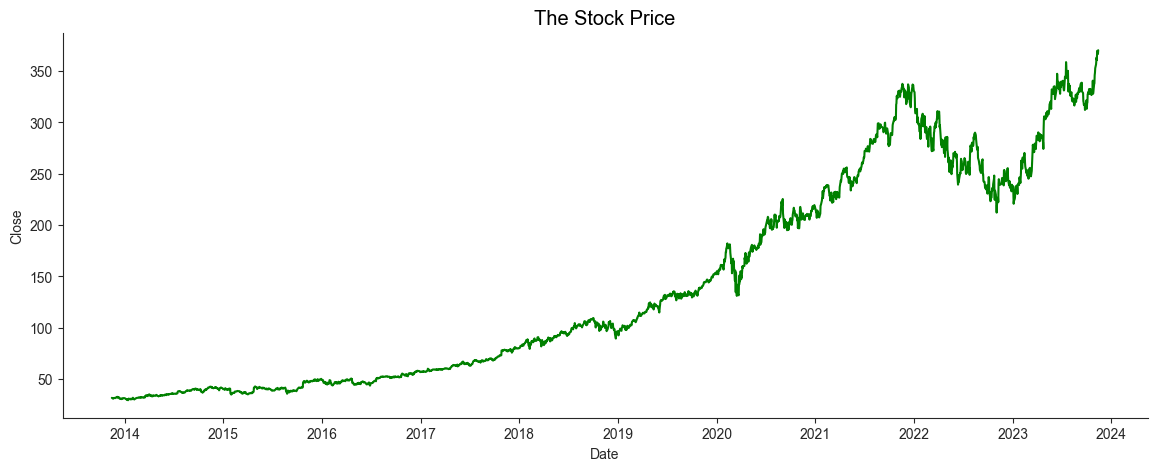

In [4]:
plt.figure(figsize=(14,5))
sns.set_style("ticks")
sns.lineplot(data=data_for_stock,x="Date",y='Close',color='green')
sns.despine()
plt.title("The Stock Price",size='x-large',color='black')

Creating the training and testing data

In [5]:
import sklearn

37


Text(0.5, 1.0, 'The Training Data')

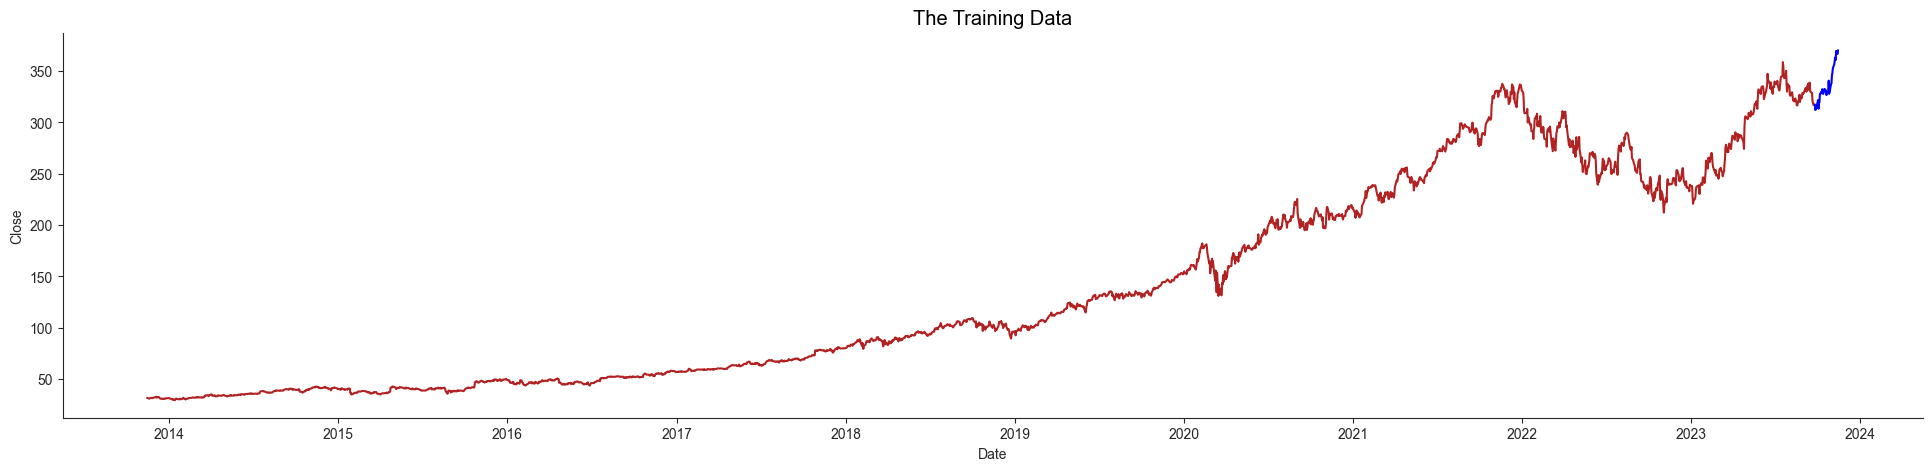

In [6]:
testing_percentage = 0.015
train_d = data_for_stock[:int(-1*len(data_for_stock)*(testing_percentage))]
test_d = data_for_stock[int(-1*len(data_for_stock)*testing_percentage):]

print(len(test_d))

plt.figure(figsize=(24,5))
sns.set_style("ticks")
sns.lineplot(data=train_d,x="Date",y='Close',color='firebrick')
sns.lineplot(data=test_d,x="Date", y='Close', color='blue')
sns.despine()
plt.title("The Training Data",size='x-large',color='black')

In [7]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=150, min_samples_split=200, random_state=1)
predictors = ["Close", "Open", "High", "Low", "Volume"]
x_pred = ["Day", "Yesterday"]
temp123 = train_d["Day"].values.reshape(len(train_d["Day"]), -1)

temp2 = []
for i in train_d["Close"]:
    temp2.append(int(i))
model.fit(temp123, temp2)

RandomForestClassifier(min_samples_split=200, n_estimators=150, random_state=1)

In [8]:
from sklearn.metrics import precision_score

predictions = model.predict(test_d["Day"].values.reshape(len(test_d["Day"]), -1))
predictions_target = pd.Series(predictions, index=test_d.index)
precision_score(test_d["Day"], predictions_target)

ValueError: Target is multiclass but average='binary'. Please choose another average setting, one of [None, 'micro', 'macro', 'weighted'].

In [ ]:
predictions